In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from beehive import *
import random

In [2]:
liste_point = lecture_csv_points('champ.csv')

c:\Users\Consultant\Documents\Depots_GIT\laplateforme\ruche\beehive.py:94: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, nouvelle_ligne], ignore_index=True)
c:\Users\Consultant\Documents\Depots_GIT\laplateforme\ruche\beehive.py:117: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_liste_moyenne = pd.concat([df_liste_moyenne, pd.DataFrame({


,Instance,Nom,Generation,Numero,Trajet,Distance_totale
0,<beehive.Abeille object at 0x000001AF5D85B050>,abeille_g127_n29,127,29,"[(929, 389), (684, 273), (371, 429), (494, 898...",13498.208532
1,<beehive.Abeille object at 0x000001AF5D87FCB0>,abeille_g114_n9,114,9,"[(862, 361), (730, 742), (437, 601), (330, 410...",13647.555040
2,<beehive.Abeille object at 0x000001AF5D87F950>,abeille_g114_n11,114,11,"[(45, 549), (724, 631), (901, 639), (643, 404)...",13647.555040
3,<beehive.Abeille object at 0x000001AF5D87F320>,abeille_g114_n13,114,13,"[(643, 404), (837, 787), (758, 405), (704, 995...",13647.555040
4,<beehive.Abeille object at 0x000001AF5D85BF80>,abeille_g114_n33,114,33,"[(761, 772), (929, 389), (964, 726), (704, 995...",13647.555040
...,...,...,...,...,...,...
95,<beehive.Abeille object at 0x000001AF5D6C9250>,abeille_g1199_n6,1199,6,"[(273, 105), (3, 517), (908, 534), (371, 429),...",26390.580444
96,<beehive.Abeille object at 0x000001AF5D887E30>,abeille_g1199_n27,1199,27,"[(371, 429), (837, 787), (704, 995), (45, 549)...",26489.932369
97,<beehive.Abeille object at 0x000001AF5D886660>,abeille_g1199_n30,1199,30,"[(45, 549), (724, 631), (901, 639), (643, 404)...",26664.563916
98,<beehive.Abeille object at 0x000001AF5D8881D0>,abeille_g1199_n41,1199,41,"[(45, 549), (724, 631), (371, 429), (573, 903)...",26685.205912


,generation,min,moyenne,max
0,1,19777.033225,24919.775576,27764.649938
1,2,19777.033225,23800.016844,27307.872705
2,3,19777.033225,23059.342854,25235.026926
3,4,19777.033225,22355.201078,23984.949151
4,5,19777.033225,21909.473683,24431.804209
...,...,...,...,...
1194,1195,13498.208532,19319.572253,27867.911765
1195,1196,13498.208532,19296.595111,26852.364905
1196,1197,13498.208532,19391.685012,27698.858851
1197,1198,13498.208532,19474.555384,27491.162544


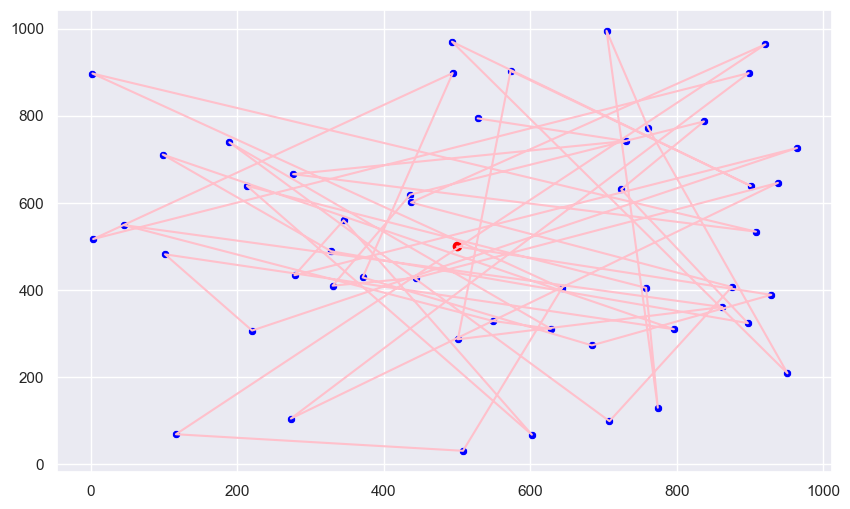

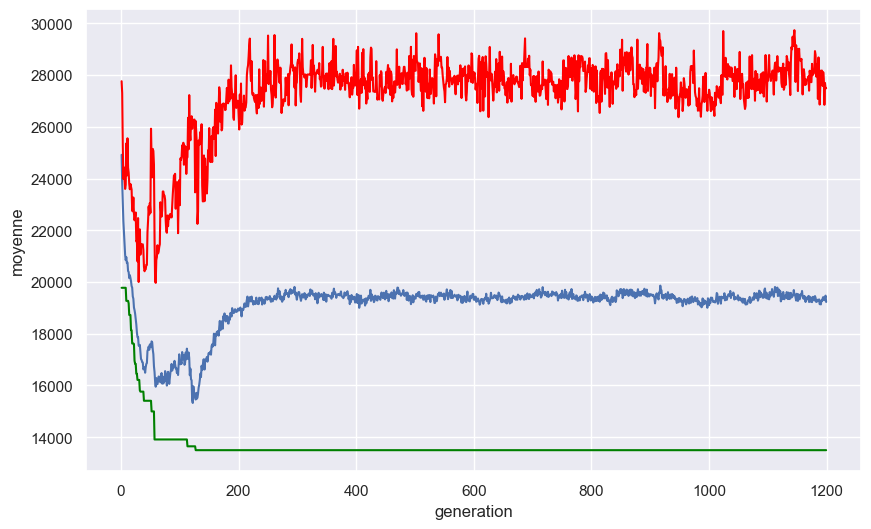

In [3]:
df_bees = creation_premiere_generation(liste_point)



for i in range(2, 1200):
    df_bees = creation_nouvelle_generation(df_bees, i)
display(df_bees.sort_values('Distance_totale').reset_index(drop=True))

# Liste des moyennes par generation
liste_moyenne = afficher_liste_moyenne()
display(liste_moyenne)

# Recherche du meilleur trajet
meilleur_trajet = df_bees.loc[0]['Trajet']

# Preparation pour le tracé
meilleur_trajet.insert(0, (500,500))
x_points, y_points = zip(*meilleur_trajet)

# Tracé
plt.figure(figsize=(10,6))
sns.set_theme()
sns.scatterplot(x=x_points, y=y_points, color='blue', marker='o')

# Tracé des lignes entre les points avec Matplotlib
plt.plot(x_points, y_points, color='pink', linestyle='-', linewidth=1.5)
plt.scatter(x=500, y=500, color='red')
plt.show()


plt.figure(figsize=(10,6))

# Affichage barplot de la moyenne en fonction de la generation
# sns.barplot(data=liste_moyenne, x='generation', y='moyenne', errorbar=None)
sns.lineplot(data=liste_moyenne, x='generation', y='moyenne', errorbar=None)

# Affichage des points minimum pour les differentes generations et reliure des points
#sns.lineplot(data= liste_moyenne, x='generation', y='min', color='green', linestyle='-', linewidth=2, marker='o', errorbar=None)
#sns.lineplot(data= liste_moyenne, x='generation', y='max', color='red', linestyle='-', linewidth=2, marker='o', errorbar=None)
sns.lineplot(data= liste_moyenne, x='generation', y='min', color='green', errorbar=None)
sns.lineplot(data= liste_moyenne, x='generation', y='max', color='red', errorbar=None)


plt.show()